In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import fetch_california_housing


# STEP 1. Data Preprocessing

## Loading dataset and EDA

In [2]:
# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Dataset information
print("\nDataset Info:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrm

We can see that there is no missing values in the data.

## Feature engineering and data split

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df['BedroomRatio'] = df['AveBedrms'] / df['AveRooms']
df['RoomsPerPerson'] = df['AveRooms'] / df['AveOccup']

# Split data into features and target
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)

print("First 5 rows of scaled training data:")
print(X_train_scaled.head())


First 5 rows of scaled training data:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
14196 -0.326196  0.348490 -0.174916  -0.208365    0.768276  0.051376   
8267  -0.035843  1.618118 -0.402835  -0.128530   -0.098901 -0.117362   
17445  0.144701 -1.952710  0.088216  -0.257538   -0.449818 -0.032280   
14265 -1.017864  0.586545 -0.600015  -0.145156   -0.007434  0.077507   
2271  -0.171488  1.142008  0.349007   0.086624   -0.485877 -0.068832   

       Latitude  Longitude  BedroomRatio  RoomsPerPerson  
14196 -1.372811   1.272587     -0.211785       -0.552017  
8267  -0.876696   0.709162      0.342185        0.526956  
17445 -0.460146  -0.447603     -0.661658        0.082291  
14265 -1.382172   1.232698      0.783032       -0.869143  
2271   0.532084  -0.108551     -0.550364        0.661600  


## Visualizing correlations

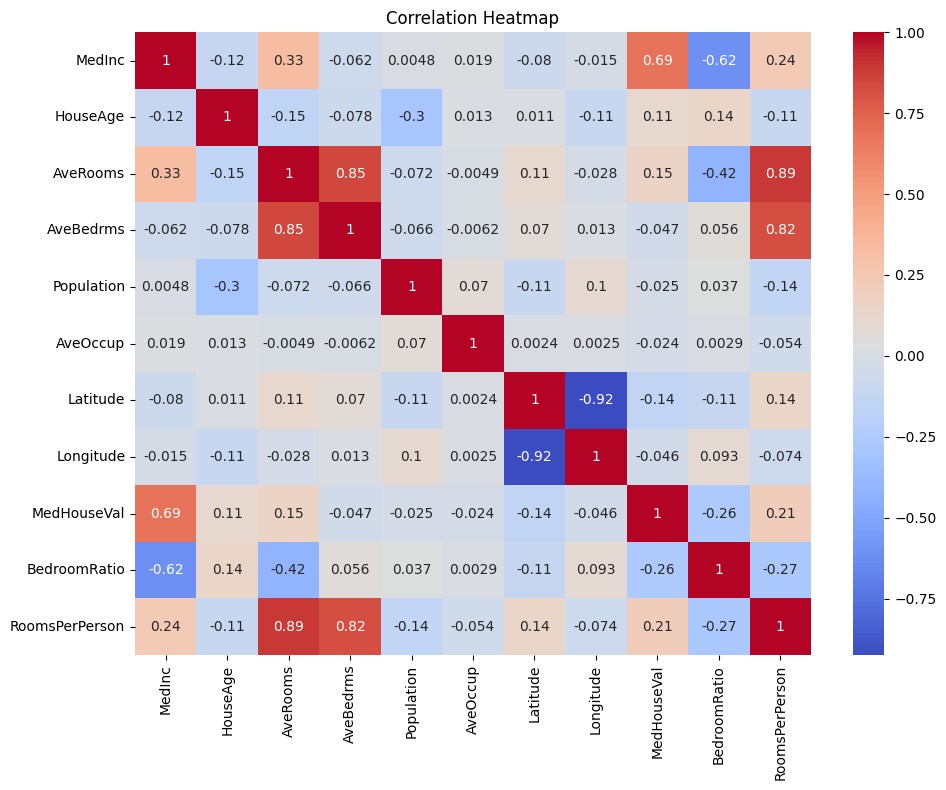


Feature Correlations with MedHouseVal:
MedHouseVal       1.000000
MedInc            0.688075
RoomsPerPerson    0.209482
AveRooms          0.151948
HouseAge          0.105623
AveOccup         -0.023737
Population       -0.024650
Longitude        -0.045967
AveBedrms        -0.046701
Latitude         -0.144160
BedroomRatio     -0.255624
Name: MedHouseVal, dtype: float64


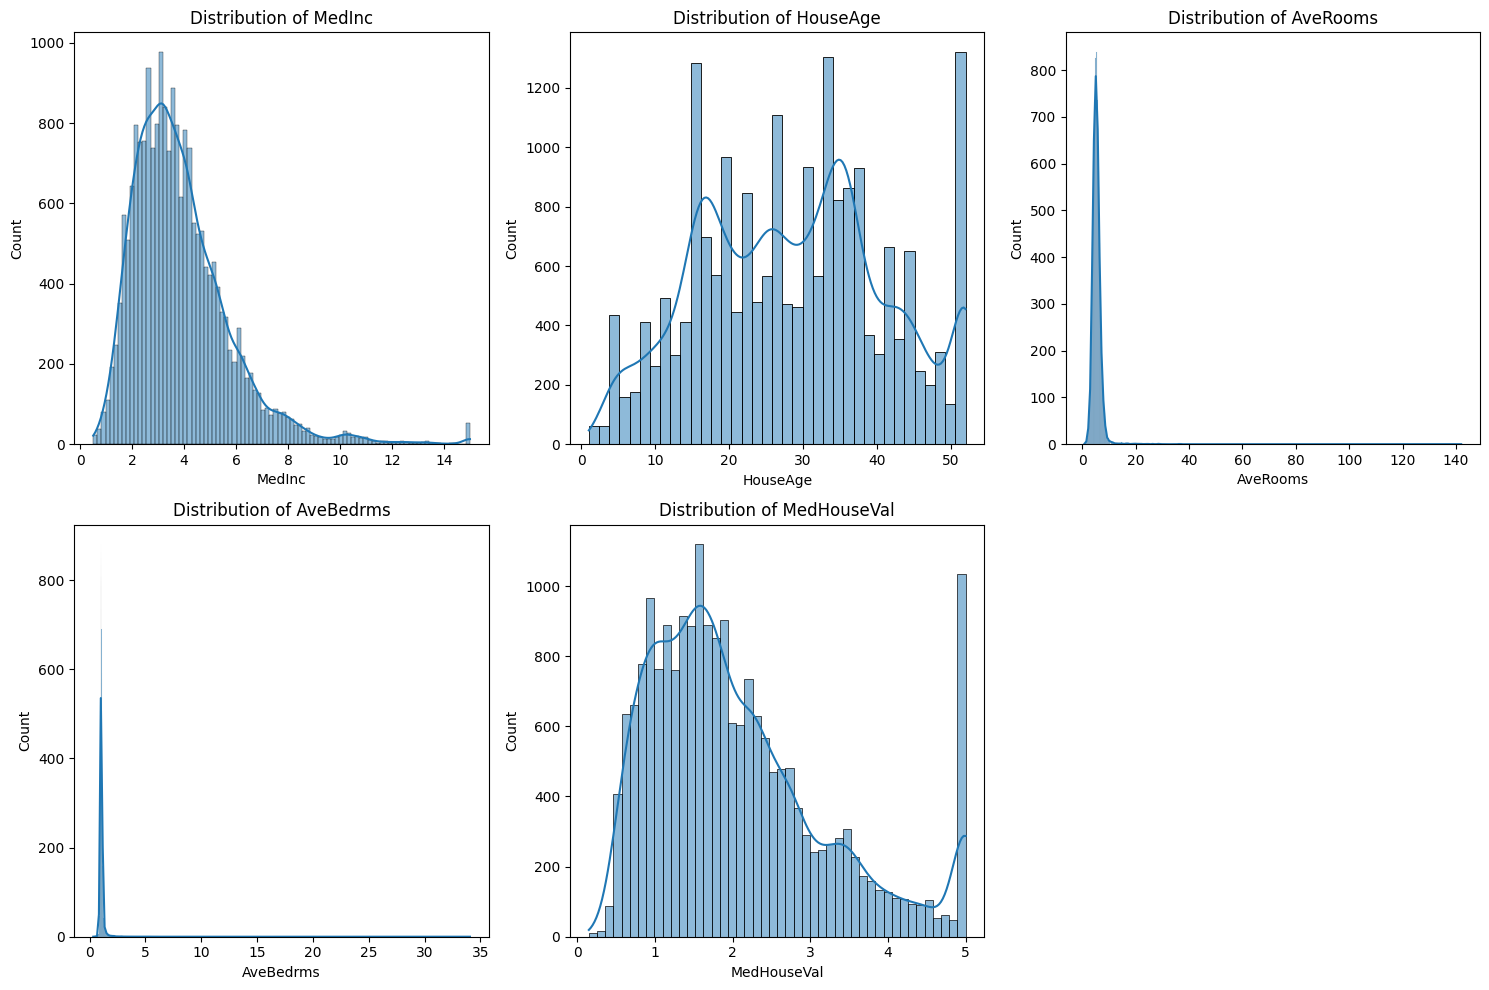

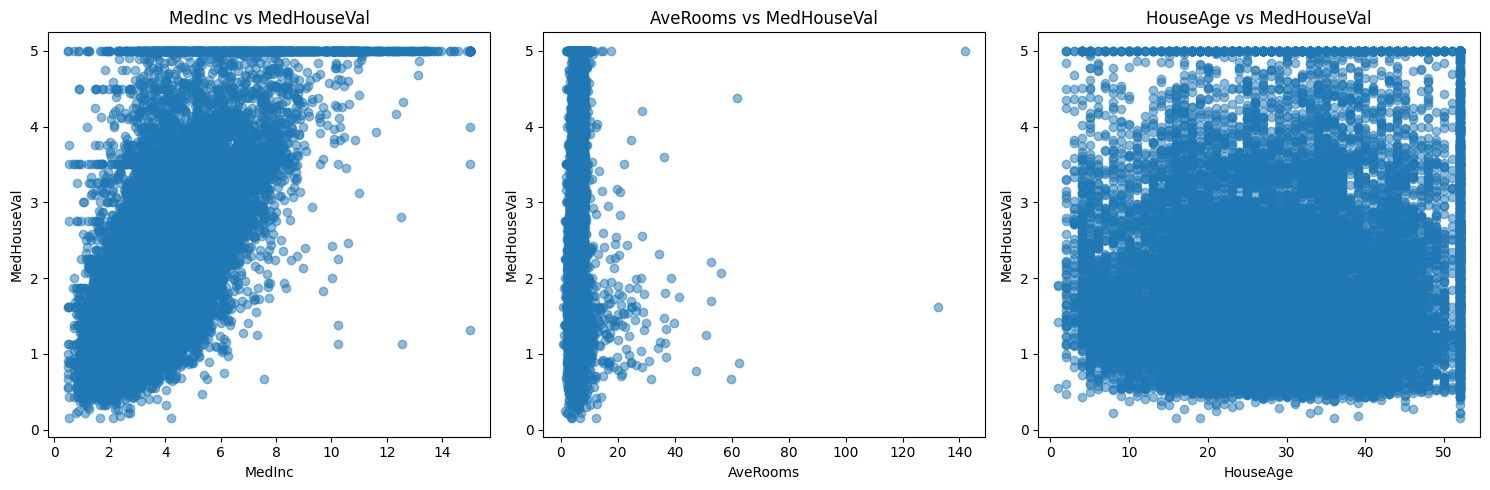

In [4]:
# Visualize correlations between features and target
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Feature importance based on correlation with target
correlations = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print("\nFeature Correlations with MedHouseVal:")
print(correlations)

# Visualize distributions of key features
plt.figure(figsize=(15, 10))
for i, column in enumerate(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'MedHouseVal']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Scatter plots of top correlated features with target
plt.figure(figsize=(15, 5))
for i, column in enumerate(['MedInc', 'AveRooms', 'HouseAge']):
    plt.subplot(1, 3, i+1)
    plt.scatter(df[column], df['MedHouseVal'], alpha=0.5)
    plt.title(f'{column} vs MedHouseVal')
    plt.xlabel(column)
    plt.ylabel('MedHouseVal')
plt.tight_layout()
plt.show()


From correlation heatmap, we can see the following:
- MedInc (median income) has the strongest positive correlation (0.69) with MedHouseVal
- AveRooms and AveBedrms have a very strong correlation with each other (0.85), suggesting multicollinearity.
- Latitude and Longitude have a strong negative correlation (-0.92), which makes geographical sense.

# Step 2: Training the Regression model.

In [5]:

# Load and prepare data
data = fetch_california_housing(as_frame=True)
df = data.frame

# Feature Engineering
df['BedroomRatio'] = df['AveBedrms'] / df['AveRooms']
df['RoomsPerPerson'] = df['AveRooms'] / df['AveOccup']
df['PopulationDensity'] = df['Population'] / df['AveOccup']

# Based on correlation heatmap, MedInc is most important
df['MedInc_squared'] = df['MedInc'] ** 2

# Split data
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']


# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print("-" * 50)

    return rmse, mae, r2

# Train and evaluate baseline models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    results[name] = evaluate_model(model, X_test_scaled, y_test, name)


Linear Regression Performance:
RMSE: 0.6753
MAE: 0.4862
R²: 0.6519
--------------------------------------------------
Ridge Regression Performance:
RMSE: 0.6754
MAE: 0.4862
R²: 0.6519
--------------------------------------------------
Random Forest Performance:
RMSE: 0.5047
MAE: 0.3289
R²: 0.8056
--------------------------------------------------
Gradient Boosting Performance:
RMSE: 0.5356
MAE: 0.3660
R²: 0.7811
--------------------------------------------------


In [6]:

# Deep Learning Model
def build_dl_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.1),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model


# Train DL model
dl_model = build_dl_model(X_train_scaled.shape[1])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = dl_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 1.1719 - mae: 0.7479 - val_loss: 0.4389 - val_mae: 0.4521
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4506 - mae: 0.4824 - val_loss: 0.4209 - val_mae: 0.4457
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4104 - mae: 0.4572 - val_loss: 0.4302 - val_mae: 0.4450
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4090 - mae: 0.4516 - val_loss: 0.4293 - val_mae: 0.4377
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3641 - mae: 0.4338 - val_loss: 0.3640 - val_mae: 0.4225
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3721 - mae: 0.4343 - val_loss: 0.3556 - val_mae: 0.4079
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3643 - mae: 0.4273 - val_loss: 0.3578 - val_mae: 0.4198
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3571 - mae: 0.4234 - val_loss: 0.3448 - val_mae: 0.4041
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3m

In [7]:
# Evaluate DL model
y_pred_dl = model.predict(X_test_scaled).flatten()
rmse_dl = np.sqrt(mean_squared_error(y_test, y_pred_dl))
mae_dl = mean_absolute_error(y_test, y_pred_dl)
r2_dl = r2_score(y_test, y_pred_dl)


print("Deep Learning Model Performance:")
print(f"RMSE: {rmse_dl:.4f}")
print(f"MAE: {mae_dl:.4f}")
print(f"R²: {r2_dl:.4f}")
print("-" * 50)


Deep Learning Model Performance:
RMSE: 0.5356
MAE: 0.3660
R²: 0.7811
--------------------------------------------------


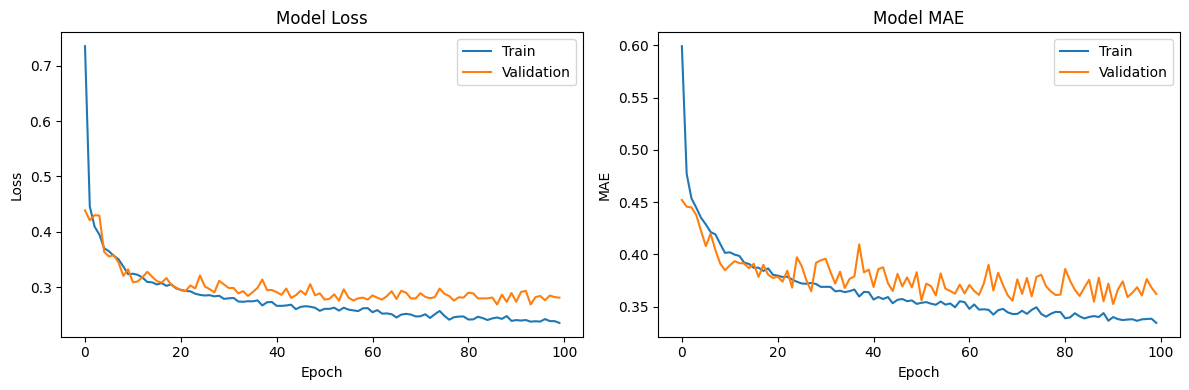

In [8]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()


## Hyperparameter optimization using RandomizedSearchCV

In [10]:
# Assuming Random Forest performed well, let's optimize it
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='neg_mean_squared_error'
)

random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_
results["Random Forest (Optimized)"] = evaluate_model(best_rf, X_test_scaled, y_test, "Random Forest (Optimized)")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40}
Random Forest (Optimized) Performance:
RMSE: 0.5083
MAE: 0.3366
R²: 0.8028
--------------------------------------------------


In [11]:
# Deep Learning Hyperparameter Tuning
def build_tunable_model(learning_rate, units1, units2, dropout1, dropout2):
    model = Sequential([
        Dense(units1, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dropout(dropout1),
        Dense(units2, activation='relu'),
        Dropout(dropout2),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])
    return model

# Define parameter grid for DL model
param_grid_dl = {
    'learning_rate': [0.001, 0.01, 0.0001],
    'units1': [64, 128, 256],
    'units2': [32, 64, 128],
    'dropout1': [0.2, 0.3, 0.4],
    'dropout2': [0.1, 0.2, 0.3],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

# Manual grid search for DL model (simplified version)
best_dl_params = {'learning_rate': 0.001, 'units1': 128, 'units2': 64, 'dropout1': 0.3, 'dropout2': 0.2}
best_dl_model = build_tunable_model(
    best_dl_params['learning_rate'],
    best_dl_params['units1'],
    best_dl_params['units2'],
    best_dl_params['dropout1'],
    best_dl_params['dropout2']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
best_dl_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.8223 - mae: 0.9142 - val_loss: 0.5380 - val_mae: 0.4735
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5453 - mae: 0.5265 - val_loss: 0.4640 - val_mae: 0.4461
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4946 - mae: 0.4991 - val_loss: 0.5727 - val_mae: 0.4618
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4815 - mae: 0.4822 - val_loss: 0.4290 - val_mae: 0.4353
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4346 - mae: 0.4664 - val_loss: 0.3977 - val_mae: 0.4332
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4021 - mae: 0.4544 - val_loss: 0.3887 - val_mae: 0.4219
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3982 - mae: 0.4484 - val_loss: 0.3788 - val_mae: 0.4190
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3852 - mae: 0.4441 - val_loss: 0.3655 - val_mae: 0.4113
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss:

In [12]:
# Evaluate optimized DL model
y_pred_dl_opt = best_dl_model.predict(X_test_scaled).flatten()
rmse_dl_opt = np.sqrt(mean_squared_error(y_test, y_pred_dl_opt))
mae_dl_opt = mean_absolute_error(y_test, y_pred_dl_opt)
r2_dl_opt = r2_score(y_test, y_pred_dl_opt)

print("Optimized Deep Learning Model Performance:")
print(f"RMSE: {rmse_dl_opt:.4f}")
print(f"MAE: {mae_dl_opt:.4f}")
print(f"R²: {r2_dl_opt:.4f}")
print("-" * 50)

# Compare all models
models_comparison = pd.DataFrame({
    'Model': list(results.keys()) + ['Deep Learning', 'Deep Learning (Optimized)'],
    'RMSE': [res[0] for res in results.values()] + [rmse_dl, rmse_dl_opt],
    'MAE': [res[1] for res in results.values()] + [mae_dl, mae_dl_opt],
    'R²': [res[2] for res in results.values()] + [r2_dl, r2_dl_opt]
})

print(models_comparison.sort_values('RMSE'))


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Optimized Deep Learning Model Performance:
RMSE: 0.5388
MAE: 0.3736
R²: 0.7784
--------------------------------------------------
                       Model      RMSE       MAE        R²
2              Random Forest  0.504738  0.328899  0.805587
4  Random Forest (Optimized)  0.508322  0.336584  0.802816
5              Deep Learning  0.535573  0.366026  0.781108
3          Gradient Boosting  0.535573  0.366026  0.781108
6  Deep Learning (Optimized)  0.538844  0.373582  0.778425
0          Linear Regression  0.675347  0.486164  0.651945
1           Ridge Regression  0.675356  0.486164  0.651936


In [15]:
best_model = models['Random Forest']
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

After Hyperparameter tuning,  Random forest model with n_estimators = 100 is the best model achieving R^2 = 0.80.

In [ ]:
import pickle

with open('rf_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved...")


Model saved...
